<a href="https://colab.research.google.com/github/adityakshay/Machine-Learning/blob/master/Regression_Exercise_CodeCamp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
X = [[1],[2],[3],[4],[5],[6],[7],[8],[9]]

In [3]:
train_X = [[1],[2],[3],[4],[5],[6],[7],[8],[9]]

In [4]:
print(X)

[[1], [2], [3], [4], [5], [6], [7], [8], [9]]


In [5]:
y = [1,4,9,16,25,36,49,64,81]

In [6]:
train_y = [1,4,9,16,25,36,49,64,81]

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg1 = LinearRegression()

In [9]:
reg1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg1.score(X,y)

0.9511731135066582

# Tensorflow based implementation

In [12]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [13]:
## Build computational graph
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)


# Create weights and bias
W = tf.compat.v1.Variable(tf.compat.v1.random_normal(shape=(1,)), name='weight')
b = tf.compat.v1.Variable(tf.compat.v1.random_normal(shape=(1,)), name='bias')

# Define NN parameters
learning_rate = 0.000001
epochs =1000
display_step = 100

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
pred = tf.pow(X, W)

In [15]:
num_records=  len(train_X)

# Define Cost function
#cost = tf.reduce_sum(tf.pow(pred-Y, 3))/(num_records)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(num_records)

# Have optimizer

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Epoch: 100 cost =  14037.41602
[2.0435088]
Epoch: 200 cost =  12885.27441
[2.0092547]
Epoch: 300 cost =  12676.67480
[2.0021362]
Epoch: 400 cost =  12630.26270
[2.000505]
Epoch: 500 cost =  12619.44336
[2.000122]
Epoch: 600 cost =  12616.95508
[2.0000339]
Epoch: 700 cost =  12616.47754
[2.000017]
Epoch: 800 cost =  12616.47754
[2.000017]
Epoch: 900 cost =  12616.47754
[2.000017]
Epoch: 1000 cost =  12616.47754
[2.000017]
Completed model training
 Cost post training=  12616.478 W =  [2.000017]
[[121.0049116]]


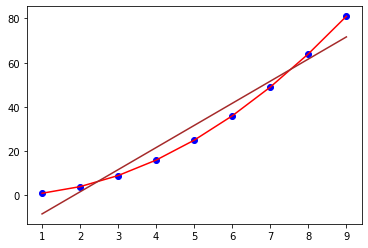

In [20]:
% pylab inline
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
  sess.run(init)
  
  for epoch in range(epochs):
    
    for (x, y ) in zip(train_X, train_y):
      sess.run([optimizer,cost], feed_dict={X:x, Y:y})
      
    if(epoch+1) % display_step ==0:
      c =  sess.run(cost, feed_dict={X: train_X, Y:train_y})
      print('Epoch:', '%d' % (epoch+1), 'cost = ', '{:.5f}'.format(c))
      print(sess.run(W))
      
  print('Completed model training')   
  training_cost = sess.run(cost,  feed_dict={X: train_X, Y:train_y})
  
  print(' Cost post training= ',training_cost, 'W = ', sess.run(W))
  #print(' Cost post training= ',training_cost, 'W = ', sess.run(W), 'bias = ', sess.run(b))
  
  plot(train_X, train_y, 'bo')
  plot(train_X,  train_X ** sess.run(W) , 'r')
  #plot(train_X, sess.run(W) * train_X + sess.run(b), 'r')
  plot(train_X, reg1.predict(train_X), color='brown')
  #plot(train_X, reg2.predict(train_X), color='green')
  tf_weight = sess.run(W)
  print( [[11]] ** sess.run(W)) 

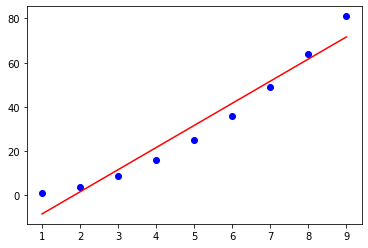

In [26]:
import matplotlib.pyplot as plot
plot.scatter(train_X,train_y, color='blue')
plot.plot(train_X,reg1.predict(train_X),color='red')
plot.show()

In [21]:
reg1.coef_

array([10.])

In [22]:
reg1.intercept_

-18.33333333333334

In [27]:
reg1.predict([[2]])

array([1.66666667])

In [28]:
-18.33333333333334 + (2*10)

1.6666666666666607

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [78]:
mse = mean_squared_error(y,reg1.predict(X))
mae = mean_absolute_error(y, reg1.predict(X))

In [79]:
import numpy as np
np.sqrt(mse)

4.715803110821629

In [80]:
mae

3.301116054739365

In [81]:
mae/np.mean(y)*100

14.650265960024178

In [83]:
np.set_printoptions(suppress=True)

#Let's find out which model accurately predicts square of 15
test=[[15],[-5],[6],[16],[200]]
#print(f'OLS Model-{reg1.predict(test)}' )
print(f'Tensorflow Model -{ (test) ** tf_weight}' )

Tensorflow Model -[[  225.01031449]
 [           nan]
 [   36.00109191]
 [  256.01201528]
 [40003.58769801]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


#Start of Tree Based Regression

In [31]:
from sklearn import tree

In [32]:
reg2 = tree.DecisionTreeRegressor()

In [87]:
reg2.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [88]:
reg2.score(train_X,train_y)

1.0

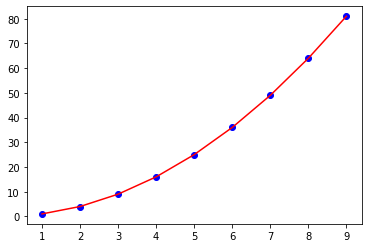

In [89]:
import matplotlib.pyplot as plot
plot.scatter(train_X,train_y, color='blue')
plot.plot(train_X,reg2.predict(train_X),color='red')
plot.show()

In [90]:
mse =  mean_squared_error(
    train_y, reg2.predict(train_X)
)

mae = mean_absolute_error(
    train_y, reg2.predict(train_X)
)

print(mse,mae)

0.0 0.0


In [92]:
test_X = [[9],[15],[33]]
test_y = [[81], [225], [1089]]

print(reg2.predict(test_X))
mse = mean_squared_error(
    test_y, reg2.predict(test_X)
)

mae = mean_absolute_error(
    test_y, reg2.predict(test_X)
)

print(mse,mae)

[81. 81. 81.]
345600.0 384.0


# Start of Boston pricing Exercise 

In [55]:
from sklearn.datasets import load_boston

In [56]:
data1 = load_boston()

In [57]:
type(data1)

sklearn.utils.Bunch

In [58]:
print(data1.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [59]:
data1.data.shape

(506, 13)

In [60]:
data1.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [61]:
print(data1.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [62]:
import pandas as pd

df = pd.DataFrame(data1.data)

In [63]:
df.head

<bound method NDFrame.head of           0     1      2    3      4   ...   8      9     10      11    12
0    0.00632  18.0   2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1    0.02731   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2    0.02729   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3    0.03237   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4    0.06905   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33
..       ...   ...    ...  ...    ...  ...  ...    ...   ...     ...   ...
501  0.06263   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  391.99  9.67
502  0.04527   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  9.08
503  0.06076   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  5.64
504  0.10959   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  393.45  6.48
505  0.04741   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  7.88

[506 rows x 13 columns]>

In [64]:
df.columns= data1.feature_names

In [65]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
data1.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [67]:
df['price']=data1.target

In [68]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

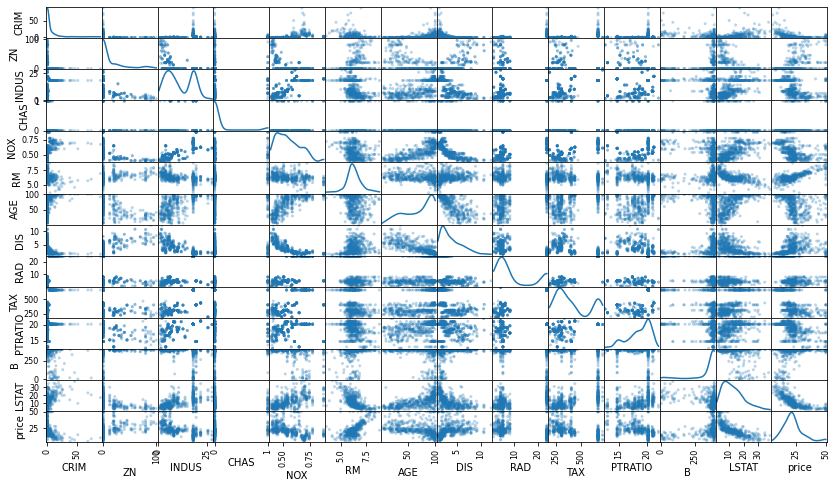

In [93]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


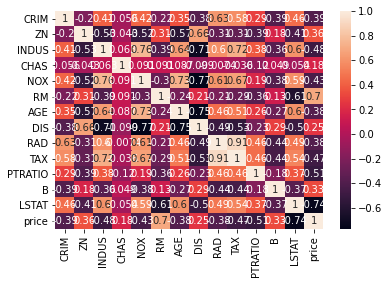

In [94]:
import seaborn as sns
df.corr()
sns.heatmap(df.corr(),annot=True)

# Modelling

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
reg1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
reg1.score(X_test,y_test)

0.7261570836552493

In [73]:
reg2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
reg2.score(X_test,y_test)

0.7522303395428345

In [96]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(reg1.coef_))], axis = 1)
print(coefficients)

          0          0
0      CRIM  -0.128750
1        ZN   0.037823
2     INDUS   0.058211
3      CHAS   3.238668
4       NOX -16.169812
5        RM   3.902051
6       AGE  -0.012851
7       DIS  -1.422224
8       RAD   0.234854
9       TAX  -0.008213
10  PTRATIO  -0.928722
11        B   0.011770
12    LSTAT  -0.547566


In [97]:
print(data1.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu